In [1]:
!pip install matplotlib
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head() # Head will take first five row

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape

(3501, 2)

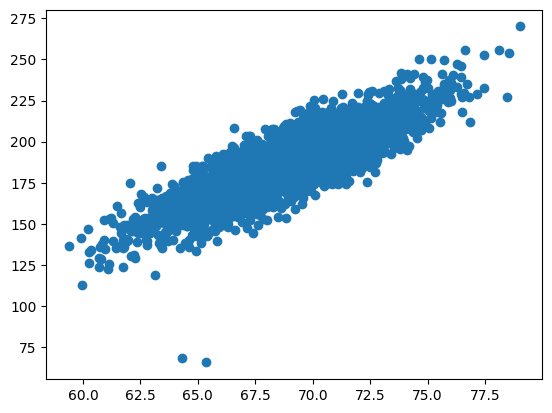

In [5]:
plt.scatter(df.Height, df.Weight) #It will plot weight as a function of Height

Text(0.5, 1.0, 'Student Height vs Weight data')

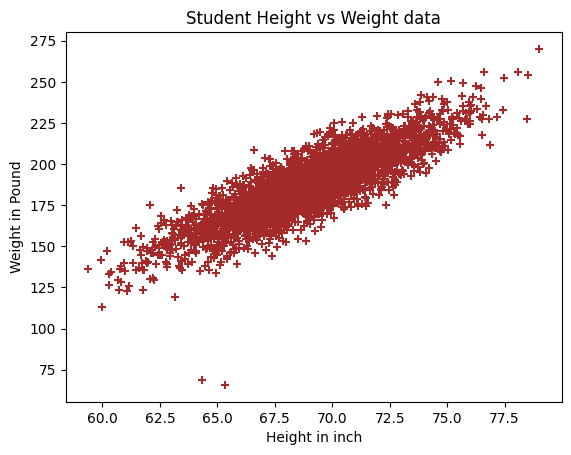

In [6]:
plt.scatter(df[['Height']], df[['Weight']], color ='brown', marker ='+' )
plt.xlabel('Height in inch')
plt.ylabel('Weight in Pound')
plt.title('Student Height vs Weight data')

In [7]:
df.Height.mean()

69.02441087268781

In [8]:
df.Weight.mean()

186.891257979463

In [9]:
y = df[['Weight']] # This will take just the Weight column 

In [10]:
x = df[['Height']] # This will take just the Height column but always have to be in 2D

In [11]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [12]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [13]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [14]:

from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state=1)
# This will spit the traing and testing data
# random state is used to stop the randomazation/changing the values every time

In [15]:
xtrain.head()

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [16]:
ytrain.head()

,Weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [17]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [18]:
ytest.head()

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


In [19]:
from sklearn.linear_model import LinearRegression 

In [20]:
reg = LinearRegression() # This will create linear regression object

In [21]:
reg.fit(xtrain, ytrain) #training model

LinearRegression()

In [48]:
reg.score(xtest,ytest) # It caclucaltes the accuracy of the model

0.7332431736613306

In [22]:
reg.predict([[73.847017]])

array([[215.41650651]])

In [23]:
m = reg.coef_

In [24]:
c = reg.intercept_

In [25]:
m

array([[5.9467582]])

In [26]:
c

array([-223.73384719])

In [27]:
predicted = (m*73.847017) + c

In [28]:
predicted

array([[215.41650651]])

In [29]:
reg.predict(xtest)

array([[177.09443165],
       [189.92284867],
       [167.62178605],
       ...,
       [179.20146692],
       [198.1912708 ],
       [190.70609708]])

In [30]:
df2 = df.copy()

In [31]:
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [38]:
df2['predicted'] = reg.predict(df[['Height']])

In [39]:
df2.head()

,Height,Weight,predicted
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


# Best Fit Line

Text(0.5, 1.0, 'Student Height vs Weight data')

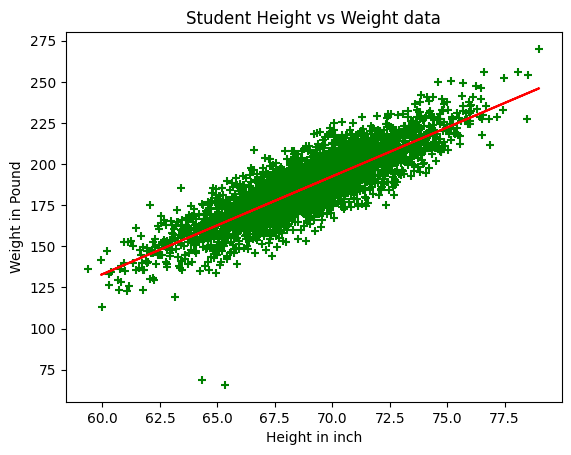

In [42]:
plt.scatter(df[['Height']], df[['Weight']], color ='green', marker ='+' )
plt.plot(xtrain, reg.predict(xtrain), color='red')
plt.xlabel('Height in inch')
plt.ylabel('Weight in Pound')
plt.title('Student Height vs Weight data')    

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [44]:
#testing MSE
test_mse = mean_squared_error(ytest, reg.predict(xtest)) #ytest is actual y, reg.predict(xtest) is actually predicted y
test_mse

111.1465440607398

In [45]:
#testing MAE
test_mse = mean_absolute_error(ytest, reg.predict(xtest))
test_mse

8.29430074943638

In [46]:
#trainin MSE
train_mse = mean_squared_error(ytrain, reg.predict(xtrain))
train_mse

103.48759292384861

In [47]:
#trainin MAE
train_mse = mean_absolute_error(ytrain, reg.predict(xtrain))
train_mse

7.955488452422422